#### IMPORT LIBRARY

In [19]:
# Import library untuk membaca data
import pandas as pd

# Import library untuk mengolah data
import numpy as np

# Import library untuk pengolahan data bahasa manusia
import nltk

# Import library untuk memeriksa apakah suatu string berisikan pola pencarian yang spesifik
import re

# Import library untuk membuat visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

#### LOAD DATASET

In [20]:
# Membaca data tweet_emotions.csv
df = pd.read_csv("data/tweet_emotions.csv")

# Mengambil 10 baris awal dari file tweet_emotions.csv
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


#### CHECK THE AMOUNT OF EACH SENTIMENT / EMOTION

In [21]:
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

#### CONVERT DATA KATEGORY TO NUMERIC

In [22]:
new_labels = {
    'anger': 0,
    'boredom': 1,
    'empty': 2,
    'enthusiasm': 3,
    'fun': 4,
    'happiness': 5,
    'hate': 6,
    'love': 7,
    'neutral': 8,
    'relief': 9,
    'sadness': 10,
    'surprise': 11,
    'worry': 12
}

# Encode labels
df['sentiment'] = df['sentiment'].map(new_labels)
df.head(10)


,tweet_id,sentiment,content
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,10,Funeral ceremony...gloomy friday...
3,1956967789,3,wants to hang out with friends SOON!
4,1956968416,8,@dannycastillo We want to trade with someone w...
5,1956968477,12,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,10,"I should be sleep, but im not! thinking about ..."
7,1956968636,12,Hmmm. http://www.djhero.com/ is down
8,1956969035,10,@charviray Charlene my love. I miss you
9,1956969172,10,@kelcouch I'm sorry at least it's Friday?


#### 1. PREPROCESSING DATA

##### A. Case Folding

In [23]:
# Remove @username
def remove_username(text):
    return re.sub(r'@[^\s]+', '', text)

# Remove url
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Remove special characters
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text


##### B. Tokenizing dan Filtering

In [24]:
# FILTERING (Stopword Removal)
from nltk.corpus import stopwords

# Mengambil data stopword bahasa inggris
sw = stopwords.words("english")

# Mengubah semua bentuk huruf menjadi huruf kecil semua
# Menghapus angka menggunakan fungsi isalpha()
def filtering_lower(text):
    final_text = []
    for i in text.split():  # Melakukan tokenize secara manual
        if i.strip().lower() not in sw and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)


##### C. Stemmer / Stemming

In [25]:
# Mengubah semua kata ke dalam bentuk dasar
def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

EXECUTION

In [26]:
# Menampilkan data mentah
print("Before\n")
print(df['content'].head())

# Memanggil semua fungsi yang telah dibuat sebelumnya
def preprocessing(text):
    # Case folding
    text = remove_username(text)
    text = remove_url(text)
    text = remove_special_characters(text, remove_digits=True)
    # Filtering
    text = filtering_lower(text)
    # Stemming
    text = stemmer(text)
    return text

# Menampilkan hasil setelah dilakukan pre-processing data
df['after_processing'] = df['content'].apply(preprocessing)
print("\nAfter\n")
print(df['after_processing'].head())

# Menyimpan data ke dalam .csv
df[['content', 'after_processing']].to_csv('data/tweet_emotions_final.csv',index=False)

Before

0    @tiffanylue i know  i was listenin to bad habi...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
Name: content, dtype: object

After

0    know listenin bad habit earlier start freakin ...
1                layin n bed headach ughhhhwaitin call
2                          funer ceremonygloomi friday
3                                want hang friend soon
4                 want trade someon houston ticket one
Name: after_processing, dtype: object


LABEL ENCODER

In [27]:
# Menggunakan LabelEncoder untuk mengkonversi nilai posisi menjadi urutan
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['sentiment'] = labelencoder.fit_transform(df['sentiment'])

df.head(10)

,tweet_id,sentiment,content,after_processing
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhhwaitin call
2,1956967696,10,Funeral ceremony...gloomy friday...,funer ceremonygloomi friday
3,1956967789,3,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,8,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one
5,1956968477,12,Re-pinging @ghostridah14: why didn't you go to...,reping didnt go prom bc bf didnt like friend
6,1956968487,10,"I should be sleep, but im not! thinking about ...",sleep im think old friend want he marri damn a...
7,1956968636,12,Hmmm. http://www.djhero.com/ is down,hmmm
8,1956969035,10,@charviray Charlene my love. I miss you,charlen love miss
9,1956969172,10,@kelcouch I'm sorry at least it's Friday?,im sorri least friday


EKSTRAKSI FITUR

In [28]:
# Mengimport fitur TF-IDF untuk melakukan pembobotan
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df["after_processing"])
y = df["sentiment"]

PEMILAHAN DATA TRAINING, TESTING, DAN VALIDASI

In [29]:
# Melakukan Pemilahan data Training dan Testing
from sklearn.model_selection import train_test_split

# Proses membagi sebagian data train untuk data testing ke dalam array
# Data testing diambil 30% dari data training dengan menggunakan code program "test_size=0.3"
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### 2. CLUSTERING

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ValueError: 'c' argument has 40000 elements, which is inconsistent with 'x' and 'y' with size 1.

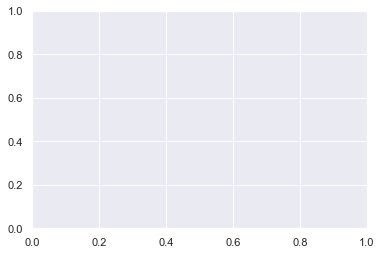

In [36]:
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


#### 3. LABELING

#### 4. CLASSIFICATION

In [ ]:
# # Training And Evaluating Model
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # C-Support Vector Classification
# model = SVC()

# # Trainingg
# model.fit(X, y)

# # Prediksi data testing
# y_pred_test = model.predict(X_test)

# # Prediksi data training
# y_pred_train = model.predict(X_train)

# # Evaluasi akurasi data training
# acc_train = accuracy_score(y_train, y_pred_train)

# # Evaluasi akurasi data training
# acc_test = accuracy_score(y_test, y_pred_test)

# # Print hasil evaluasi
# print(f'Hasil akurasi data train: {acc_train}')
# print(f'Hasil akurasi data test: {acc_test}')


ValueError: Found input variables with inconsistent numbers of samples: [300, 40000]

#### 5. PREDICT